In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\summer.csv")

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
for vars in df.columns:
  print(f'no. of unique values in {vars} : {df[vars].nunique()}\n')

no. of unique values in Year : 27

no. of unique values in City : 22

no. of unique values in Sport : 43

no. of unique values in Discipline : 67

no. of unique values in Athlete : 22762

no. of unique values in Country : 147

no. of unique values in Gender : 2

no. of unique values in Event : 666

no. of unique values in Medal : 3



# 1. In how many cities Summer Olympics is held so far?

In [5]:
df['City'].nunique(dropna=True)

22

# 2. Which sport is having most number of Gold Medals so far? (Top 5)

<AxesSubplot:xlabel='Sport'>

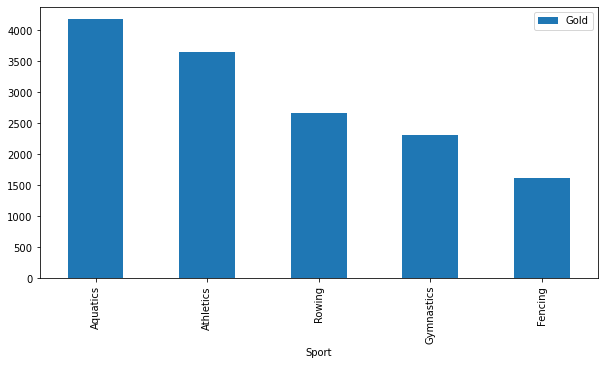

In [7]:
data = []
for sport in df['Sport'].unique():
    data.append([sport , len(df[df['Sport']  == sport])])

pd.DataFrame(data,columns = ['Sport','Gold']).sort_values(by='Gold', ascending=False).head().plot(x = 'Sport', y = 'Gold', kind = 'bar', figsize = (10,5))

# 3. Which sport is having most number of medals so far? (Top 5) 

<AxesSubplot:xlabel='Sport'>

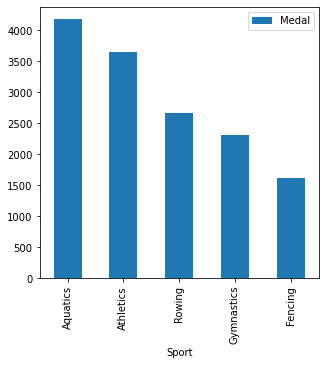

In [8]:
data = []

for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])

pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (5,5))


# 4. Which player has won most number of medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

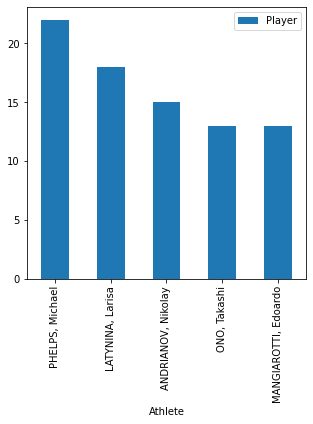

In [9]:
data = []

for Athlete in df['Athlete'].unique():
    data.append([Athlete , len(df[df['Athlete']  == Athlete])])

pd.DataFrame(data,columns = ['Athlete','Player']).sort_values(by='Player', ascending=False).head().plot(x = 'Athlete', y = 'Player', kind = 'bar', figsize = (5,5))


# 5. Which player has won most number Gold Medals of medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

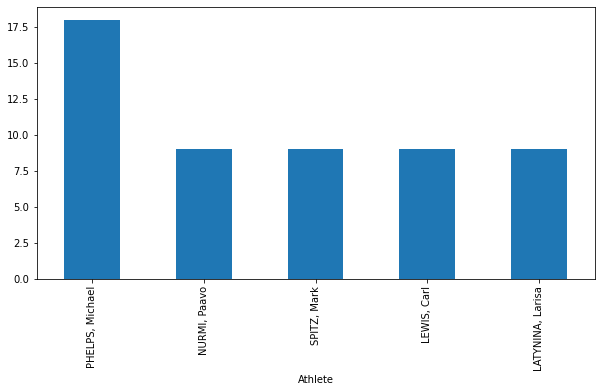

In [11]:
gold= df[df['Medal']=='Gold']
gold.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head(5).plot.bar(figsize=(10, 5))

# 6. In which year India won first Gold Medal in Summer Olympics?

In [12]:
india=df[df["Country"]=="IND"]
india.groupby("Year")["Medal"].count()


Year
1900     2
1928    15
1932    11
1936    19
1948    20
1952    15
1956    17
1960    13
1964    15
1968    15
1972    14
1980    16
1996     1
2000     1
2004     1
2008     3
2012     6
Name: Medal, dtype: int64

In [13]:
gold[gold['Country']=='IND']['Year'].min()

1928

# 7. Which event is most popular in terms on number of players? (Top 5)

<AxesSubplot:xlabel='Event'>

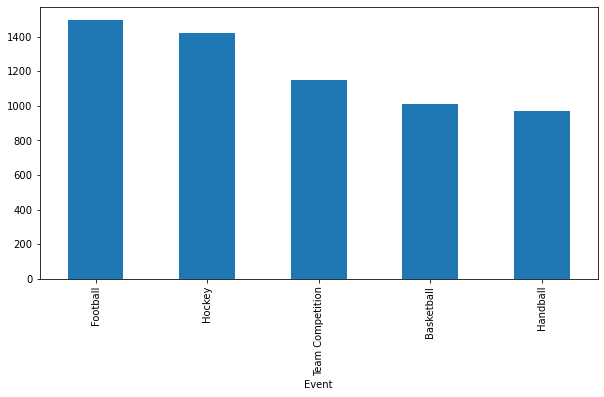

In [14]:
df.groupby("Event").count()['Athlete'].sort_values(ascending=False).head(5).plot.bar(figsize=(10, 5))

# 8. Which sport is having most female Gold Medalists? (Top 5)

In [15]:
Gender_Medals = pd.DataFrame(df.groupby('Gender')['Medal'].count().reset_index(name = 'Medal_Count'))
Gender_Medals

,Gender,Medal_Count
0,Men,22746
1,Women,8419


<AxesSubplot:xlabel='Sport'>

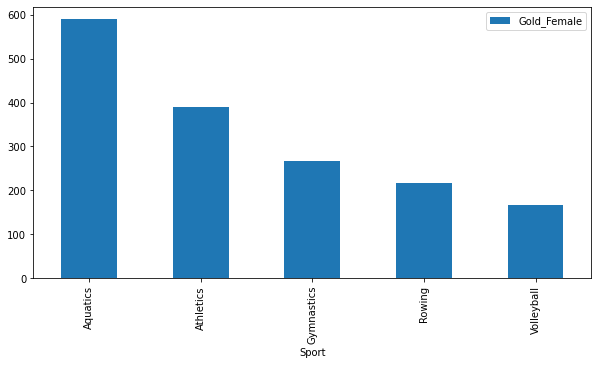

In [16]:
Gold_Female = gold[gold['Gender']=='Women']
data=[]
for sport in Gold_Female['Sport'].unique():
  data.append([sport, len(Gold_Female[Gold_Female['Sport']==sport])])

data= pd.DataFrame(data, columns=['Sport', 'Gold_Female']).sort_values(by='Gold_Female', ascending=False).head()
data.plot(x='Sport' ,y='Gold_Female', kind='bar', figsize=(10, 5))